In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [163]:
wnba = pd.read_csv(r"C:\Users\BUSINESS ANALYST\Downloads\WNBA Stats.csv")
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [4]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [8]:
parameter = wnba['Games Played'].max()
parameter

32

# Simple Sampling

In [19]:
# to pick a sample of 30 players - Use the Randon_state to ensure that the sample is same every time you ran the code
sample = wnba['Games Played'].sample(30,random_state = 1)
statistics = sample.max()

sampling_error = parameter - statistics
sampling_error

2

In [20]:
# to pick a sample of 30 players
sample = wnba['Games Played'].sample(30)
statistics = sample.max()

sampling_error = parameter - statistics
sampling_error

1

## Take 100 samples of 10 values from the dataset
     * For Each sample measure the mean and append to a list
       *  Plot a scatter - display discrepancy between parameter (popn) & statistics (sample)

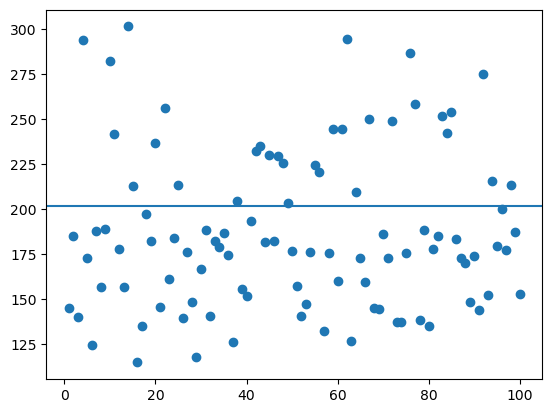

In [30]:
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)
plt.show()

## Shortcoming of Simple Sampling method.
    * It can miss some representation
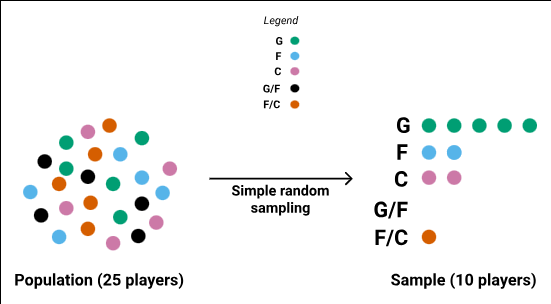

# Stratified Sampling

In [100]:
# Start by getting the mean points per player for the season
wnba['points_per_game'] = wnba['PTS']/wnba['Games Played']

# Split the dataset into stratums on player position (pos)
F = wnba[wnba['Pos']== 'F']
GF = wnba[wnba['Pos']== 'G/F']
G = wnba[wnba['Pos']== 'G']
C = wnba[wnba['Pos']== 'C']
FC = wnba[wnba['Pos']== 'F/C']

points_per_position = {}

for stratum, position in [(F, 'F'),(GF,'GF'),(G,'G'),(C,'C'),(FC, 'FC')]:
    sample = stratum['points_per_game'].sample(10,random_state = 0)
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get) 
    
points_per_position

{'F': 8.702175158545568,
 'GF': 6.817264935760487,
 'G': 7.092926195632343,
 'C': 9.833761394334251,
 'FC': 9.059118773946361}

In [116]:
wnba['Games Played'].agg([np.mean,np.max, np.median])

mean      24.356643
amax      32.000000
median    27.000000
Name: Games Played, dtype: float64

In [122]:
# To check for the games played and what percentage of the people played on each category
    # (22.0, 32.0] Menas the start is not included but the end is
wnba['Games Played'].value_counts(bins = 3, normalize = True) *100

Games Played
(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: proportion, dtype: float64

## Stratify the data by the number of games played
    Perform stratefied sampling on the data set 100 times

## Guide to chosing a stratum
    
1. Minimize the variability within each stratum
    The range should be small (not having 10 & 500 in one stratum)
2. Maximize the variability between strata
    
3. The stratification criteria should correlate strongly with the property you measuring    

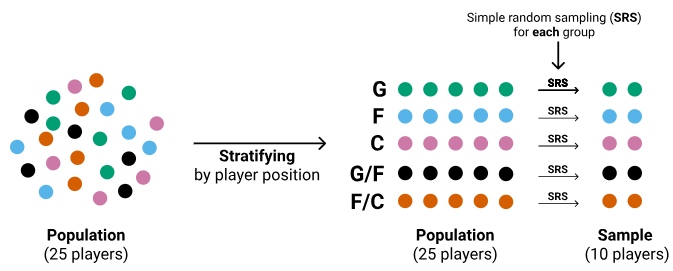

In [126]:
under_12 = wnba[wnba['Games Played'] <= 12]

btw_12_22 = wnba[(wnba['Games Played'] >12) &(wnba['Games Played'] <=22)]

over_23 = wnba[wnba['Games Played'] > 22]


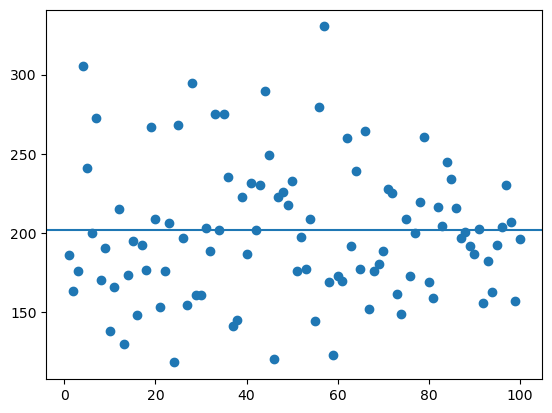

In [128]:
proportional_sampling_means = []

for i in range (100):
    sample_under_12 = under_12['PTS'].sample(1,random_state= i)
    sample_btw_12_22 = btw_12_22['PTS'].sample(2,random_state = i)
    sample_over_23 = over_23['PTS'].sample(7,random_state = i)
    
    final_sample = pd.concat([sample_under_12,sample_btw_12_22,sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
plt.show()

In [139]:
wnba['MIN'].value_counts(bins = 8,normalize= True)*100

MIN
(10.993, 137.75]    16.083916
(640.75, 766.5]     14.685315
(766.5, 892.25]     13.286713
(263.5, 389.25]     12.587413
(137.75, 263.5]     11.888112
(389.25, 515.0]     11.188811
(515.0, 640.75]     11.188811
(892.25, 1018.0]     9.090909
Name: proportion, dtype: float64

In [ ]:
a100 = wnba[wnba['Min'] <= 112]
b100 = wnba[(wnba['Min'] > 112) &(wnba['Min'] <=22)]

over_23 = wnba[wnba['Games Played'] > 22]

# Cluster Sampling
    Is where the data sources are many and you have to make a decision on the sources to get the saples from
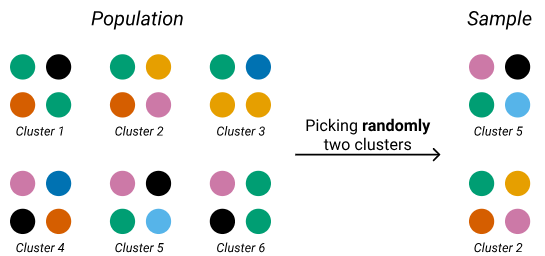    

In [160]:
# In our dataset, We assume that each team is a different data source
Teams = wnba['Team'].unique()

# We want to pick randomly the teams to use - Ensure there are no duplicates

clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)
clusters

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

# Revisit

In [185]:
# clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

# sam = pd.DataFrame()

# for cluster in clusters:
#     data_collected = wnba[wnba['Team'] == cluster]
#     sam = sam.append(data_collected)
# # 
# sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
# sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
# sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
# sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

TypeError: DataFrame.merge() got an unexpected keyword argument 'axis'

In [ ]:
joined = pd.concat([join1, join2], axis =0, ignore_index = True)